# DogGo Customer Segmentation Project

## Introduction
DogGo is an application whose goal is to match dog owners and dog walkers. DogGO trains its own dog walkers and matches them to the most appropriate dog and its owner. Associates of DogGo would like to be very good at matching and customer satisfaction. One of the steps of improving customer satisfaction is defining the different customer segmentations. For example, if it is known that which customer belongs to which cluster, a campaign can be organized directly aimed at customers. In order to reach the right customer in the right cluster, customer segmentation must be applied quite accurately.

DogGo collects the different types of data related to owners, dogs, walkers, etc. Walks Customer Segment and Owner datasets are the most proper two ones to cluster the customer. The Walks Customer Segment and the Owners datasets were merged and it consists of 49 columns and 61,275 transactions. 

Firstly, the RFM method will be applied, and according to RFM data, customer segmentation will be carried out using the K-means clustering algorithm. Then, clustering will be tried to improve doing necessary trails and changes such as changing the number of clusters, adding a variable to the RFM dataset, or another variable that can be used instead of one of the RFM variables. Data visualization will be used to inspect the clusters. Graphs will guide what the next step is.
After completing K-means, the GMM clustering algorithm can be applied as another trail to get a more accurate result. 



## Pre-processing

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
df_owners = pd.read_excel("/content/drive/MyDrive/DogGo/owners.xlsx")

In [94]:
df = pd.read_excel("/content/drive/MyDrive/DogGo/walksCustomerSegment.xlsx")

In [95]:
df = pd.merge(df, df_owners, left_on="ownerid", right_on="id", how='left')

In [96]:
df.head()

,Unnamed: 0_x,Unnamed: 0.1_x,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,ownerid,walkingid,walkid,walkerid,dogid,paymentid,walkingtype,walkstatus,duration,ordercreatedtime,checkintime,confirmtime,matchtime,starttime,endtime,cancelledby,cancelreason,heat,walkgroup,distance,district,neighborhood,walkerF_commWithPeople,walkerF_commWithPariahDog,walkerF_commWithStreetCat,walkerF_goodPath,walkerF_walkWithDogAgain,walkerF_note,ownerF_commWithMe,ownerF_commWithDog,ownerF_timeAccuracy,ownerF_appPerformance,ownerF_note,paymentstatus,paymenttype,amount,discount,walkerincome,promocodeid,finishtime,Unnamed: 0_y,Unnamed: 0.1_y,id,mgapplytime,signuptime,firstdogaddedtime
0,0,0,0,0,61000,00d2941f-7e9f-4422-a662-2d9012607d35,810c2b91-3962-4a46-9d2c-0b8d2466476c,810c2b91-3962-4a46-9d2c-0b8d2466476c,5b15dbef-554c-4e9d-8e78-29b034cdcb25,436db8e3-981c-4c74-97b8-a2ecbbed07a2,b0095c6f-e810-4d53-94ba-4edd1e852bb4,Boarding,Finished,NaN,2021-02-09 21:24:14.228,2021-02-12 03:00:00,2021-02-12 05:50:24.404,2021-02-10 09:48:06.177,2021-02-12 12:07:05.207,NaT,NaN,NaN,NaN,NaN,NaN,Kağıthane,Çeliktepe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved,Paid,89.900000,0.0,120.46,NaN,2021-02-14 17:20:28.268,27378.0,27378.0,00d2941f-7e9f-4422-a662-2d9012607d35,2021-01-13 13:25:43.583,2020-11-22 19:05:28.360,2020-11-22 19:11:03.686
1,1,1,1,1,61001,00d2941f-7e9f-4422-a662-2d9012607d35,810c2b91-3962-4a46-9d2c-0b8d2466476c,810c2b91-3962-4a46-9d2c-0b8d2466476c,5b15dbef-554c-4e9d-8e78-29b034cdcb25,436db8e3-981c-4c74-97b8-a2ecbbed07a2,b0095c6f-e810-4d53-94ba-4edd1e852bb4,Boarding,Finished,NaN,2021-02-09 21:24:14.228,2021-02-13 03:00:00,2021-02-12 05:50:24.404,2021-02-10 09:48:06.177,2021-02-12 12:07:05.207,NaT,NaN,NaN,NaN,NaN,NaN,Kağıthane,Çeliktepe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved,Paid,89.900000,0.0,120.46,NaN,2021-02-14 17:20:28.268,27378.0,27378.0,00d2941f-7e9f-4422-a662-2d9012607d35,2021-01-13 13:25:43.583,2020-11-22 19:05:28.360,2020-11-22 19:11:03.686
2,2,2,2,2,61002,016038b4-2391-44d7-9391-7d622f537ac5,437d9524-c3b9-4491-adae-6e5d21a4d1cd,437d9524-c3b9-4491-adae-6e5d21a4d1cd,b71ffc33-0dab-4c92-bb6e-8e16e2b3d980,576a59c0-fc12-427c-ab02-c1b2b4c6ede1,fcf25ec2-0153-49c1-ad88-43464b1a4a58,Boarding,Finished,NaN,2020-11-02 13:36:46.512,2020-11-15 03:00:00,2020-11-12 12:51:06.849,2020-11-10 12:23:38.922,2020-11-13 14:20:16.152,NaT,NaN,NaN,NaN,NaN,NaN,Kadıköy,Fenerbahçe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved,Paid,154.285714,0.0,800.00,NaN,2020-11-20 14:41:09.625,9818.0,9818.0,016038b4-2391-44d7-9391-7d622f537ac5,NaT,2020-11-02 12:42:20.316,2020-11-02 12:52:48.225
3,3,3,3,3,61003,016038b4-2391-44d7-9391-7d622f537ac5,437d9524-c3b9-4491-adae-6e5d21a4d1cd,437d9524-c3b9-4491-adae-6e5d21a4d1cd,b71ffc33-0dab-4c92-bb6e-8e16e2b3d980,576a59c0-fc12-427c-ab02-c1b2b4c6ede1,fcf25ec2-0153-49c1-ad88-43464b1a4a58,Boarding,Finished,NaN,2020-11-02 13:36:46.512,2020-11-16 03:00:00,2020-11-12 12:51:06.849,2020-11-10 12:23:38.922,2020-11-13 14:20:16.152,NaT,NaN,NaN,NaN,NaN,NaN,Kadıköy,Fenerbahçe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved,Paid,154.285714,0.0,800.00,NaN,2020-11-20 14:41:09.625,9818.0,9818.0,016038b4-2391-44d7-9391-7d622f537ac5,NaT,2020-11-02 12:42:20.316,2020-11-02 12:52:48.225
4,4,4,4,4,61004,016038b4-2391-44d7-9391-7d622f537ac5,437d9524-c3b9-4491-adae-6e5d21a4d1cd,437d9524-c3b9-4491-adae-6e5d21a4d1cd,b71ffc33-0dab-4c92-bb6e-8e16e2b3d980,576a59c0-fc12-427c-ab02-c1b2b4c6ede1,fcf25ec2-0153-49c1-ad88-43464b1a4a58,Boarding,Finished,NaN,2020-11-02 13:36:46.512,2020-11-17 03:00:00,2020-11-12 12:51:06.849,2020-11-10 12:23:38.922,2020-11-13 14:20:16.152,NaT,NaN,NaN,NaN,NaN,NaN,Kadıköy,Fenerbahçe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved,Paid,154.285714,0.0,800.00,NaN,2020-11-20 14:41:09.625,9818.0,9818.0,016038b4-2391-44d7-9391-7d622f537ac5,NaT,2020-11-02 12:42:20.316,2020-11-02 12:52:48.225


In [97]:
df.shape

(64565, 51)

### Missing Values
Detecting missing values is important because missing values can be effect the RFM creating proceses and customer segmentation. Each variable is not necessary to create RFM. The most important columns are ownerid, walkingid, checkintime and amount. They will be used to crate recency, frequency and monetary columns. There is no missing value in those variables.

In [98]:
#checking the missing values

df.isna().sum()

Unnamed: 0_x                     0
Unnamed: 0.1_x                   0
Unnamed: 0.1.1                   0
Unnamed: 0.1.1.1                 0
Unnamed: 0.1.1.1.1               0
ownerid                          0
walkingid                        0
walkid                           0
walkerid                      1121
dogid                            0
paymentid                        0
walkingtype                      0
walkstatus                       0
duration                       275
ordercreatedtime                 0
checkintime                      0
confirmtime                  13429
matchtime                    59753
starttime                     1143
endtime                       1418
cancelledby                  63419
cancelreason                 63421
heat                          1418
walkgroup                    19875
distance                      1367
district                         0
neighborhood                 43809
walkerF_commWithPeople       56791
walkerF_commWithPari

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64565 entries, 0 to 64564
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0_x               64565 non-null  int64         
 1   Unnamed: 0.1_x             64565 non-null  int64         
 2   Unnamed: 0.1.1             64565 non-null  int64         
 3   Unnamed: 0.1.1.1           64565 non-null  int64         
 4   Unnamed: 0.1.1.1.1         64565 non-null  int64         
 5   ownerid                    64565 non-null  object        
 6   walkingid                  64565 non-null  object        
 7   walkid                     64565 non-null  object        
 8   walkerid                   63444 non-null  object        
 9   dogid                      64565 non-null  object        
 10  paymentid                  64565 non-null  object        
 11  walkingtype                64565 non-null  object        
 12  walk

In [100]:
unnamed_cols = [col for col in df.columns if 'Unnamed: ' in col]
print(unnamed_cols)

['Unnamed: 0_x', 'Unnamed: 0.1_x', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1', 'Unnamed: 0_y', 'Unnamed: 0.1_y']


In [101]:
df = df.drop(unnamed_cols, axis=1)

In [102]:
df.describe()

,duration,distance,walkerF_commWithPeople,walkerF_commWithPariahDog,walkerF_commWithStreetCat,walkerF_goodPath,walkerF_walkWithDogAgain,ownerF_commWithMe,ownerF_commWithDog,ownerF_timeAccuracy,ownerF_appPerformance,amount,discount,walkerincome
count,64290.0,63198.000000,7774.000000,7774.000000,7774.000000,7774.000000,7774.000000,4478.000000,4478.000000,4478.000000,4478.000000,64565.000000,62713.000000,62713.000000
mean,45.0,5.418176,0.978647,0.852843,0.845897,0.953692,0.974273,0.991961,0.989058,0.987271,0.980348,26.251791,14.773813,17.658943
std,0.0,166.602915,0.144568,0.354285,0.361071,0.210165,0.158329,0.089311,0.104044,0.112115,0.138816,6.793103,101.021468,21.483709
min,45.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,45.0,0.864714,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,0.000000,15.000000
50%,45.0,1.744401,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,0.000000,15.250000
75%,45.0,2.599516,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.900000,0.000000,17.100000
max,45.0,10239.525872,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,168.750000,1120.000000,1050.000000


## Exploratory Data Analysis
In this part, data visualization will be carried out to understand datasets deeply. According to insights extracted from graphs, necessary corrections can be made. If there is a correction or change, it will be explained below the related graph or code.

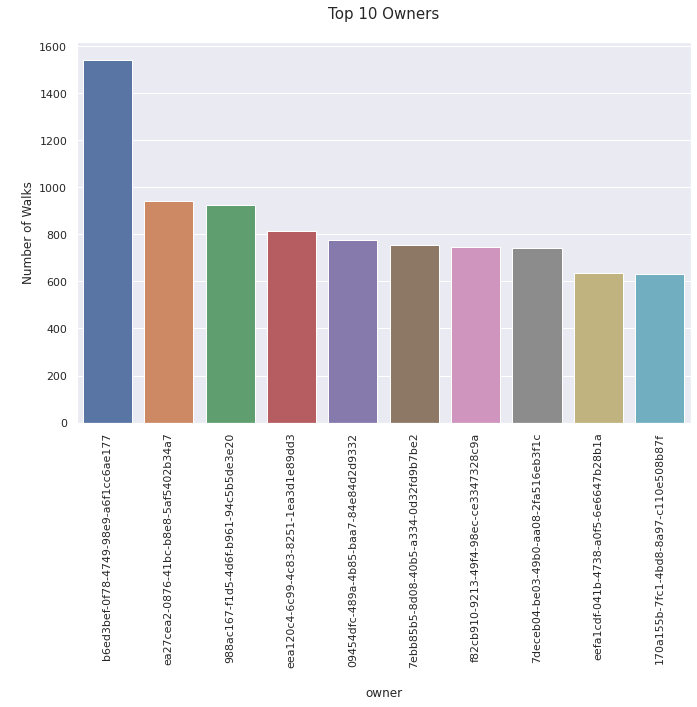

In [103]:
owner_first10 = df["ownerid"].value_counts(sort= True).head(10)
owner_first10 = pd.DataFrame(owner_first10)
owner_first10 = owner_first10.reset_index()

sns.set(rc={'figure.figsize':(11, 7)})
sns.barplot(x= "index", y= "ownerid", data= owner_first10)
plt.xlabel("\nowner")
plt.ylabel("\nNumber of Walks")
plt.title("Top 10 Owners\n", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

Top ten owners according to number of walks represents frequency in other word the f column and the graph above shows that there is a customer that has many transaction and there is a significant difference between first customer and second customer. The other ones are similar to each other.

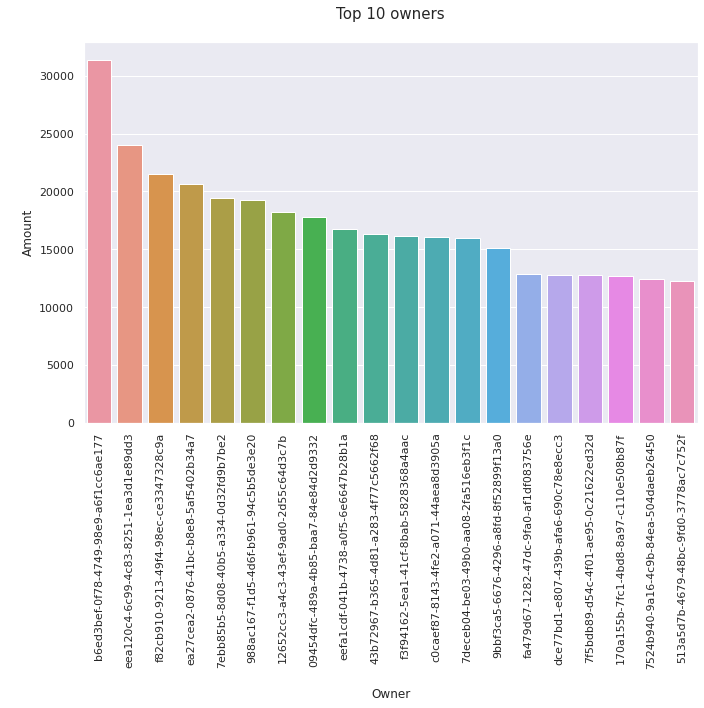

In [104]:
amount_owner = df.groupby("ownerid")["amount"].sum().sort_values(ascending=False)
amount_owner20 = amount_owner.head(20)

amount_owner20 = pd.DataFrame(amount_owner20)
amount_owner20 = amount_owner20.reset_index()

sns.set(rc={'figure.figsize':(11, 7)})
sns.barplot(x= "ownerid", y= "amount", data= amount_owner20)
plt.xlabel("\nOwner")
plt.ylabel("\nAmount")
plt.title("Top 10 owners\n", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

This graph is similar to previous graph, the difference is this graph repsesent monetary it means it is based on amount. there is also another similarity that a customer spent money distictly. Mean and standard deviation will be investigated below as a next step of the effect of this difference.

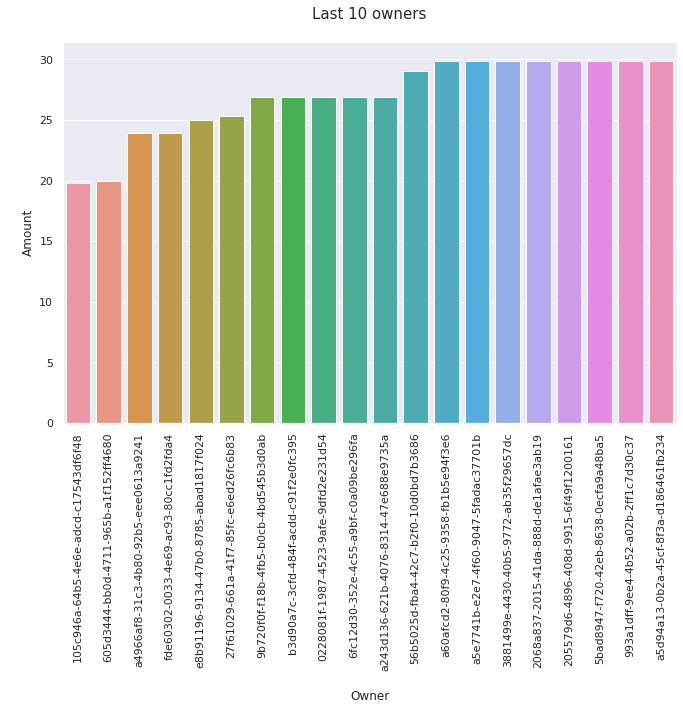

In [105]:
amount_owner = df.groupby("ownerid")["amount"].sum().sort_values()
amount_owner20 = amount_owner.head(20)

amount_owner20 = pd.DataFrame(amount_owner20)
amount_owner20 = amount_owner20.reset_index()

sns.set(rc={'figure.figsize':(11, 7)})
sns.barplot(x= "ownerid", y= "amount", data= amount_owner20)
plt.xlabel("\nOwner")
plt.ylabel("\nAmount")
plt.title("Last 10 owners\n", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


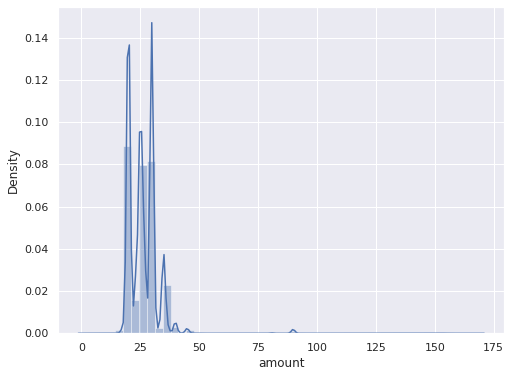

In [106]:
plt.figure(figsize=(8, 6))
sns.distplot(df["amount"])
plt.show()

The amount distribution is like normal distribution.

In [107]:
gby_ownerid = df.groupby("ownerid")["amount"].sum().sort_values(ascending=False)
gby_ownerid

ownerid
b6ed3bef-0f78-4749-98e9-a6f1cc6ae177    31350.840000
eea120c4-6c99-4c83-8251-1ea3d1e89dd3    23992.080000
f82cb910-9213-49f4-98ec-ce3347328c9a    21524.990000
ea27cea2-0876-41bc-b8e8-5af5402b34a7    20674.215037
7ebb85b5-8d08-40b5-a334-0d32fd9b7be2    19432.000000
                                            ...     
e8b91196-9134-47b0-8785-abad1817f024       25.000000
fde60302-0033-4e69-ac93-80cc1fd2fda4       23.920000
a4966af8-31c3-4b80-92b5-eee0613a9241       23.920000
605d3444-bb0d-4711-965b-a1f152ff4680       20.000000
105c946a-64b5-4e6e-adcd-c17543df6f48       19.790000
Name: amount, Length: 1558, dtype: float64

In [108]:
gby_ownerid.describe()

count     1558.000000
mean      1087.899177
std       2482.511568
min         19.790000
25%         59.900000
50%        274.500000
75%        934.370000
max      31350.840000
Name: amount, dtype: float64

The standard deviation is so high when it compares with mean. The most spending customer affects the standard deviaton and this customer will not be taken into account.

In [109]:
df = df[df["ownerid"] != "b6ed3bef-0f78-4749-98e9-a6f1cc6ae177"]
#df = df[df["ownerid"] != "8988f208-b453-4302-9d72-420d36ed580f"]
#df = df[df["ownerid"] != "af0e4d22-7d04-4f84-88c5-4a6c1c15fc07"]

In [110]:
df["amount"].sort_values(ascending=True).head(20)

3827      1.00
35747     9.00
62643    10.00
51537    10.00
45894    10.00
36012    10.00
60159    16.00
16283    16.48
16284    16.48
16285    16.48
16287    16.48
16282    16.48
16288    16.48
16289    16.48
16290    16.48
16291    16.48
16286    16.48
16281    16.48
16279    16.48
16278    16.48
Name: amount, dtype: float64

The numbers less than 16.48 can be misleading amounts and they affect the mean and they will be replaced with median of the amount.

In [111]:
unknown_amount_list = [0, 1, 9, 10, 16]
                       
df['amount'] = df['amount'].replace(unknown_amount_list, df.amount.median())

df["amount"].sort_values(ascending=True).head(20)

16291    16.48
16289    16.48
16278    16.48
16279    16.48
16280    16.48
16281    16.48
16282    16.48
16283    16.48
16288    16.48
16284    16.48
16285    16.48
16286    16.48
16287    16.48
16290    16.48
54626    17.50
54622    17.50
2502     17.50
2505     17.50
2904     17.75
2931     17.75
Name: amount, dtype: float64

In [112]:
gby_ownerid2 = df.groupby("ownerid")["amount"].sum().sort_values(ascending=False)
gby_ownerid2

ownerid
eea120c4-6c99-4c83-8251-1ea3d1e89dd3    23992.080000
f82cb910-9213-49f4-98ec-ce3347328c9a    21524.990000
ea27cea2-0876-41bc-b8e8-5af5402b34a7    20674.215037
7ebb85b5-8d08-40b5-a334-0d32fd9b7be2    19432.000000
988ac167-f1d5-4d6f-b961-94c5b5de3e20    19238.780000
                                            ...     
e8b91196-9134-47b0-8785-abad1817f024       25.000000
fde60302-0033-4e69-ac93-80cc1fd2fda4       23.920000
a4966af8-31c3-4b80-92b5-eee0613a9241       23.920000
605d3444-bb0d-4711-965b-a1f152ff4680       20.000000
105c946a-64b5-4e6e-adcd-c17543df6f48       19.790000
Name: amount, Length: 1557, dtype: float64

In [113]:
gby_ownerid2.describe()

count     1557.000000
mean      1068.534103
std       2361.804021
min         19.790000
25%         59.900000
50%        274.500000
75%        930.950000
max      23992.080000
Name: amount, dtype: float64

As a result of changes, the standart deviation was reduced. 

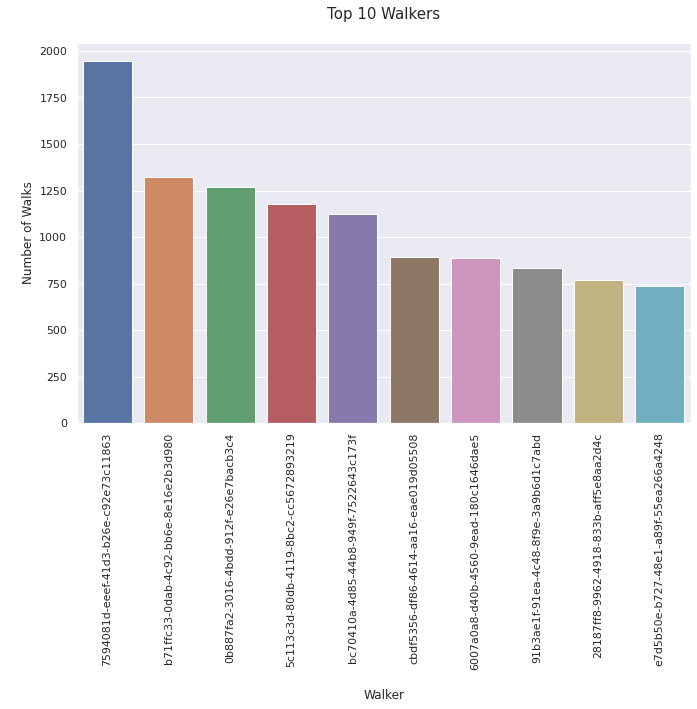

In [114]:
walker_first10 = df["walkerid"].value_counts(sort= True).head(10)
walker_first10 = pd.DataFrame(walker_first10)
walker_first10 = walker_first10.reset_index()

sns.set(rc={'figure.figsize':(11, 7)})
sns.barplot(x= "index", y= "walkerid", data= walker_first10)
plt.xlabel("\nWalker")
plt.ylabel("\nNumber of Walks")
plt.title("Top 10 Walkers\n", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

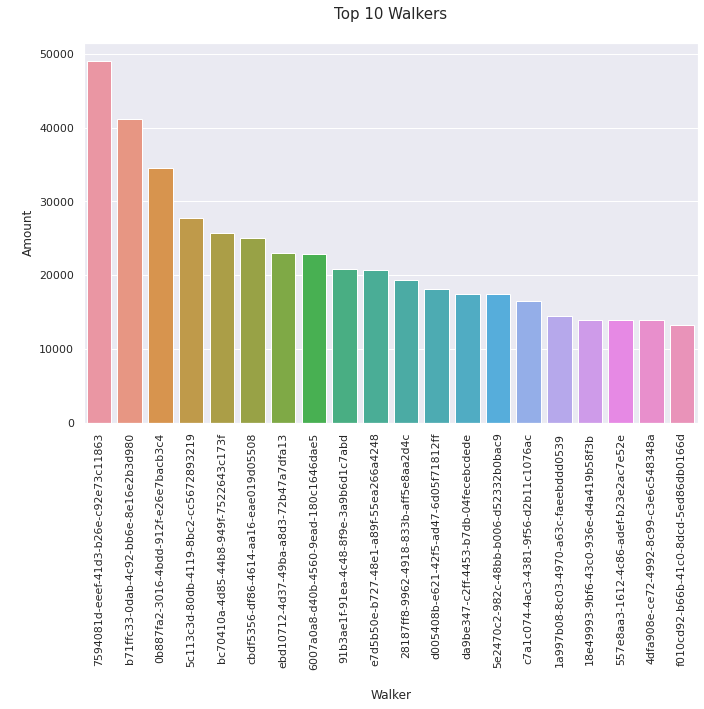

In [115]:
amount_walker = df.groupby("walkerid")["amount"].sum().sort_values(ascending=False)
amount_walker20 = amount_walker.head(20)

amount_walker20 = pd.DataFrame(amount_walker20)
amount_walker20 = amount_walker20.reset_index()

sns.set(rc={'figure.figsize':(11, 7)})
sns.barplot(x= "walkerid", y= "amount", data= amount_walker20)
plt.xlabel("\nWalker")
plt.ylabel("\nAmount")
plt.title("Top 10 Walkers\n", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

A similar investigation was done for the top ten walkers, but there is no abnormal case.

In [116]:
def format_spines(ax, right_border=True):
    """docstring for format_spines:
    this function sets up borders from an axis and personalize colors
    input:
        ax: figure axis
        right_border: flag to determine if the right border will be visible or not"""
    
    # Setting up colors
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_color('#FFFFFF')
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')

def count_plot(feature, df, colors='Blues_d', hue=False):
    """docstring for count_plot:
    this function plots data setting up frequency and percentage. This algo sets up borders
    and personalization
    input:
        feature: feature to be plotted
        df: dataframe
        colors = color palette (default=Blues_d)
        hue = second feature analysis (default=False)"""
    
    # Preparing variables
    ncount = len(df)
    fig, ax = plt.subplots()
    if hue != False:
        ax = sns.countplot(x=feature, data=df, palette=colors, hue=hue)
    else:
        ax = sns.countplot(x=feature, data=df, palette=colors)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    # Setting borders
    format_spines(ax)
    format_spines(ax2)

    # Setting percentage
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    if not hue:
        ax.set_title(df[feature].describe().name + ' Analysis', size=13, pad=15)
    else:
        ax.set_title(df[feature].describe().name + ' Analysis by ' + hue, size=13, pad=15)   
    plt.show()

<Figure size 720x576 with 0 Axes>

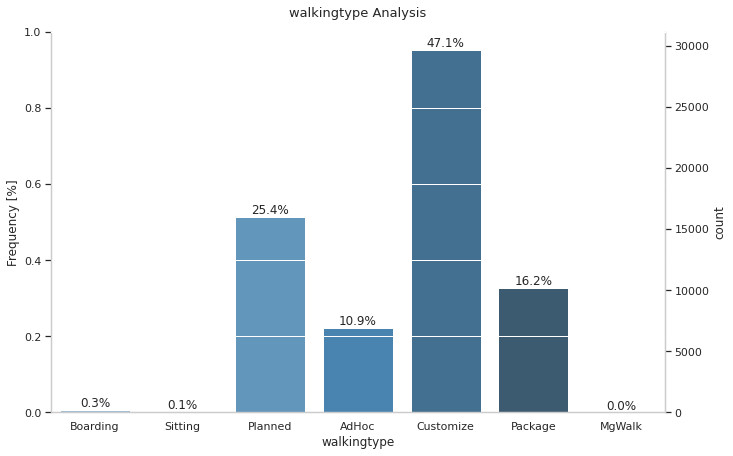

In [117]:
plt.figure(figsize=(10, 8))
count_plot(feature="walkingtype", df=df)

According to walking type analysis, almost half of all transactions are customize walking which generated by customers based on their schedules or choises. Planned walking is second and it means 25% walks were scheduled before the walking, but this category includes only single walks.

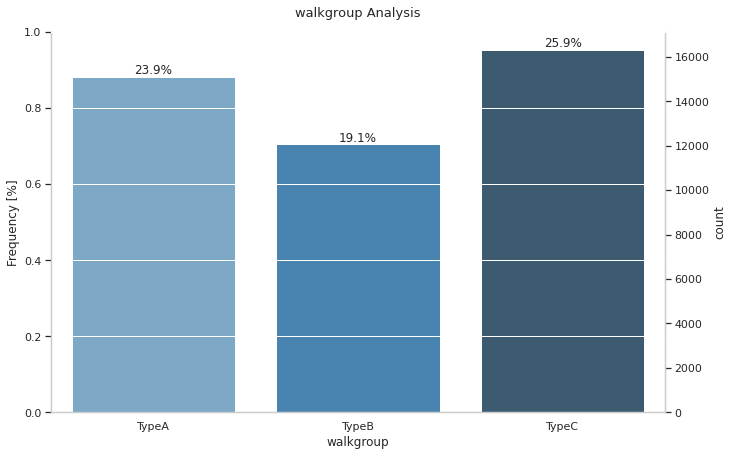

In [118]:
count_plot(feature="walkgroup", df=df)


Walk group is related to dog types, and dog types are defined according to dogs' weight. There is no significant difference between these three categories.

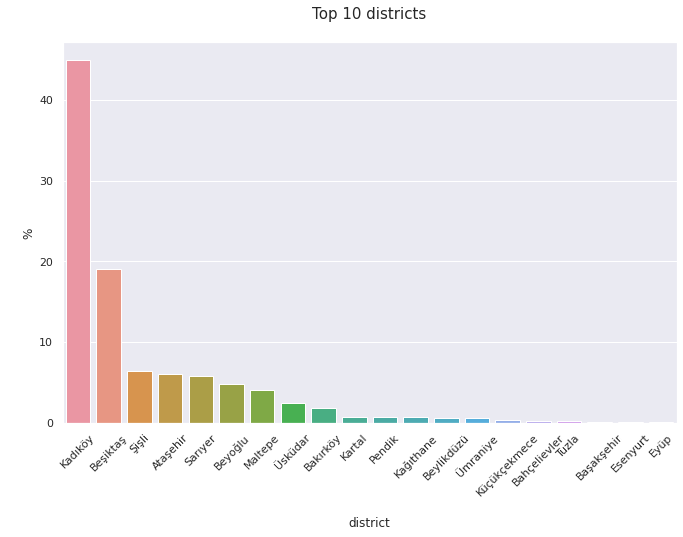

In [119]:
perc_district = df["district"].value_counts()/len(df["district"])*100
perc_district20 = perc_district.head(20)

perc_district20 = pd.DataFrame(perc_district20)
perc_district20 = perc_district20.reset_index()

sns.set(rc={'figure.figsize':(11, 7)})
sns.barplot(x= "index", y= "district", data= perc_district20)
plt.xlabel("\ndistrict")
plt.ylabel("\n%")
plt.title("Top 10 districts\n", fontsize = 15)
plt.xticks(rotation=45)
plt.show()

In the top ten districts, Kadıköy is the number one, and there is a significant difference. The district variable can be used as a supporting variable of rfm in the following step to separate customer groups. On the other hand, another customer segmentation can be done for Kadiköy particularly.

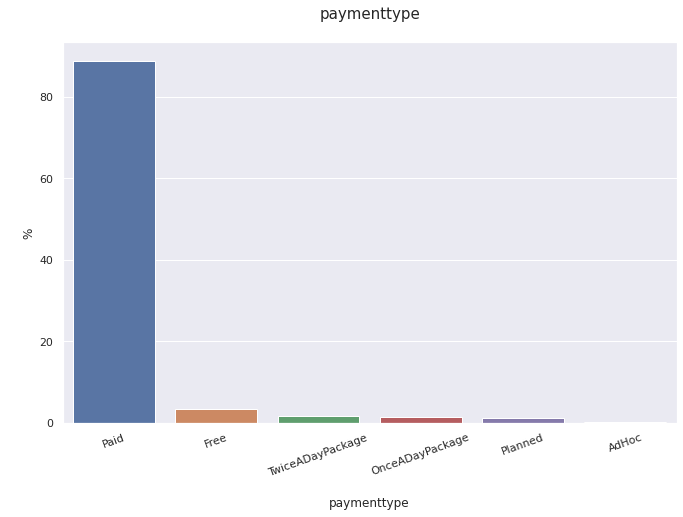

In [120]:
perc_paymenttype = df["paymenttype"].value_counts()/len(df["paymenttype"])*100

perc_paymenttype = pd.DataFrame(perc_paymenttype)
perc_paymenttype = perc_paymenttype.reset_index()

sns.set(rc={'figure.figsize':(11, 7)})
sns.barplot(x= "index", y= "paymenttype", data= perc_paymenttype)
plt.xlabel("\npaymenttype")
plt.ylabel("\n%")
plt.title("paymenttype\n", fontsize = 15)
plt.xticks(rotation=20)
plt.show()

Paymenttype variable consists of almost paid walkings.

In [121]:
perc_paymentstatus = df[df["paymentstatus"] == "Free"]
nof_free = len(perc_paymentstatus)

perc_paymentstatus = df[df["paymentstatus"] == "Approved"]
nof_paid= len(perc_paymentstatus)
print('Free: {} and Approved:"{}"'.format(nof_free, nof_paid))

Free: 2089 and Approved:"59083"


##RFM

In [122]:
df= df[df["walkstatus"] == "Finished"]

### Preprocessing

In [123]:
df['checkin_revized'] = np.where(df['checkintime'] >= df['ordercreatedtime'], df['checkintime'], df['ordercreatedtime'])

In [124]:
df['checkin_revized'].sort_values(ascending=False)

76      2021-04-19 03:00:00
77      2021-04-19 03:00:00
34305   2021-04-18 07:30:00
128     2021-04-18 03:00:00
32487   2021-04-17 15:00:00
                ...        
9642    2019-01-03 16:00:00
15772   2019-01-03 07:00:00
7975    2019-01-03 06:00:00
7972    2019-01-03 05:00:00
9647    2019-01-03 05:00:00
Name: checkin_revized, Length: 61880, dtype: datetime64[ns]

In [125]:
#df['checkin_revized'] = df["checkintime"]

In [126]:
df['checkin_revized'] = df['checkin_revized'].dt.normalize()

In [127]:
df.checkin_revized.sort_values(ascending=False).head(10)

76      2021-04-19
77      2021-04-19
34305   2021-04-18
128     2021-04-18
54089   2021-04-17
127     2021-04-17
6479    2021-04-17
32487   2021-04-17
32486   2021-04-17
53989   2021-04-17
Name: checkin_revized, dtype: datetime64[ns]

In [128]:
print("Min:{}; Max:{}".format(min(df.checkin_revized), max(df.checkin_revized)))


Min:2019-01-03 00:00:00; Max:2021-04-19 00:00:00


In [129]:
'''import datetime

start_date = pd.to_datetime('today')
start_date'''


"import datetime\n\nstart_date = pd.to_datetime('today')\nstart_date"

In [130]:
import datetime

start_date = max(df.checkin_revized)
start_date

Timestamp('2021-04-19 00:00:00')

In [131]:
end_date = start_date - datetime.timedelta(days=365)
end_date

Timestamp('2020-04-19 00:00:00')

In [132]:
mask = (df['checkin_revized'] > end_date) & (df['checkin_revized'] <= start_date)

In [133]:
df_lastyear = df.loc[mask]

In [134]:
snapshot_date = start_date + datetime.timedelta(days=1)
snapshot_date

Timestamp('2021-04-20 00:00:00')

In [135]:
datamart =  df_lastyear.groupby(["ownerid"]).agg({"checkin_revized": lambda x: (snapshot_date - x.max()).days,
                                         "checkintime": "count",
                                         "amount": "sum"})

In [136]:
datamart.head()

,checkin_revized,checkintime,amount
ownerid,,,
0062f2a6-878d-4100-9bea-2b50e266a56e,212,1,29.90
008fabab-f868-4019-8b50-4022025b51b2,226,27,807.40
00d2941f-7e9f-4422-a662-2d9012607d35,66,2,179.80
012069f5-41a9-472c-ad99-1d72ceca4966,316,6,169.90
0122b307-340f-41e4-88ac-bdd9e14eb26d,39,5,146.51


In [137]:
datamart.rename(columns={"checkintime": "Frequency",
                         "checkin_revized": "Recency",
                         "amount": "MonetaryValue"}, inplace=True)

In [138]:
datamart_tenure = df.groupby(["ownerid"]).agg({"checkin_revized": lambda x: (snapshot_date - x.min()).days})

In [139]:
datamart = pd.merge(datamart, datamart_tenure, left_on="ownerid", right_on="ownerid", how='left')

In [140]:
datamart.head()

,Recency,Frequency,MonetaryValue,checkin_revized
ownerid,,,,
0062f2a6-878d-4100-9bea-2b50e266a56e,212,1,29.90,212
008fabab-f868-4019-8b50-4022025b51b2,226,27,807.40,415
00d2941f-7e9f-4422-a662-2d9012607d35,66,2,179.80,67
012069f5-41a9-472c-ad99-1d72ceca4966,316,6,169.90,347
0122b307-340f-41e4-88ac-bdd9e14eb26d,39,5,146.51,415


In [141]:
datamart.rename(columns={"checkin_revized": "Tenure"}, inplace=True)

In [142]:
datamart.head()

,Recency,Frequency,MonetaryValue,Tenure
ownerid,,,,
0062f2a6-878d-4100-9bea-2b50e266a56e,212,1,29.90,212
008fabab-f868-4019-8b50-4022025b51b2,226,27,807.40,415
00d2941f-7e9f-4422-a662-2d9012607d35,66,2,179.80,67
012069f5-41a9-472c-ad99-1d72ceca4966,316,6,169.90,347
0122b307-340f-41e4-88ac-bdd9e14eb26d,39,5,146.51,415


K-means

In [143]:
datamart.describe()

,Recency,Frequency,MonetaryValue,Tenure
count,1085.000000,1085.000000,1085.000000,1085.000000
mean,92.800922,36.971429,999.545488,253.930876
std,92.329583,74.839867,1920.672790,191.318955
min,1.000000,1.000000,19.790000,4.000000
25%,12.000000,3.000000,80.730000,117.000000
50%,53.000000,9.000000,296.310000,204.000000
75%,164.000000,31.000000,900.000000,407.000000
max,364.000000,581.000000,15907.370000,838.000000


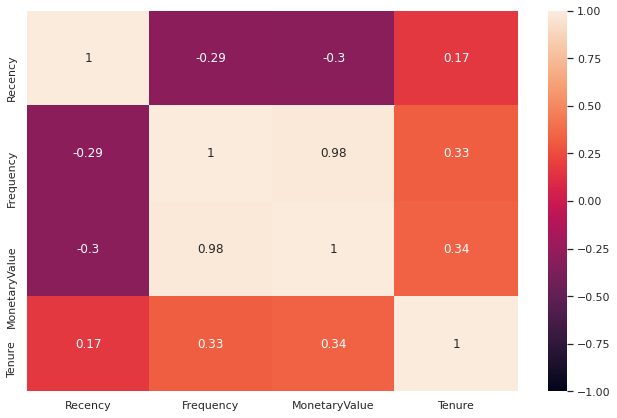

In [144]:
heatmap_all = sns.heatmap(datamart.corr(), vmin=-1, vmax=1, annot=True)

In [145]:
datamart = datamart.drop("Frequency", axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


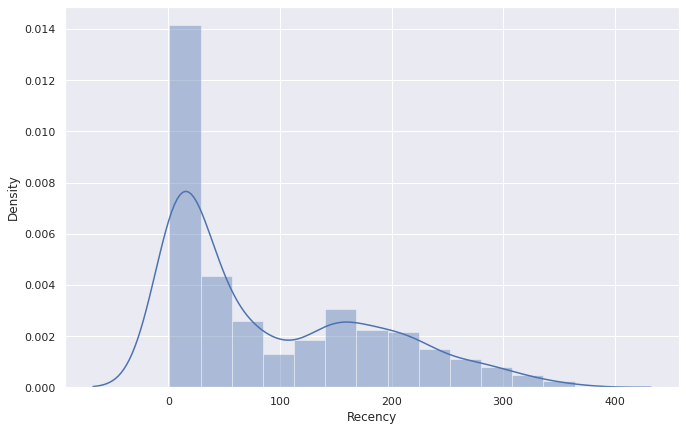

In [146]:
sns.distplot(datamart["Recency"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


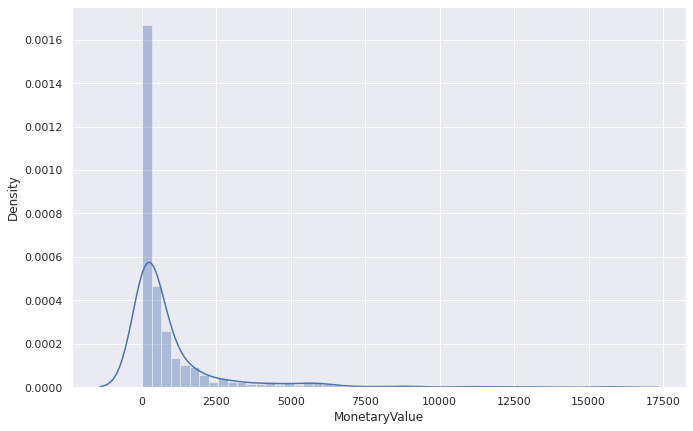

In [147]:
sns.distplot(datamart["MonetaryValue"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


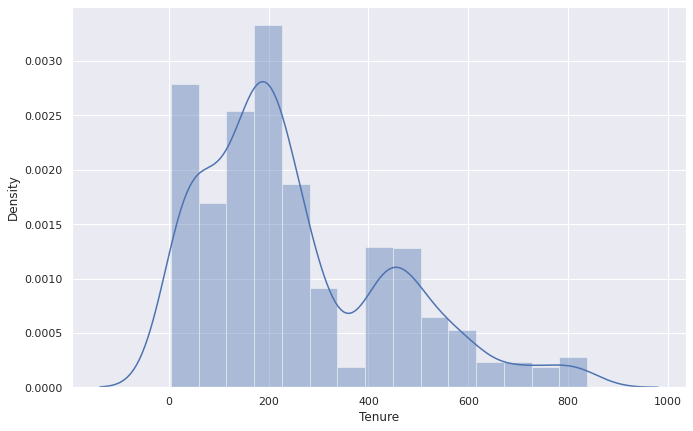

In [148]:
sns.distplot(datamart["Tenure"])
plt.show()

In [149]:
from scipy import stats
print(stats.shapiro(datamart["Recency"]))
print(stats.shapiro(datamart["MonetaryValue"]))
print(stats.shapiro(datamart["Tenure"]))

(0.8588888645172119, 4.293482772028118e-30)
(0.5277084708213806, 0.0)
(0.9123618602752686, 1.5956375318528849e-24)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

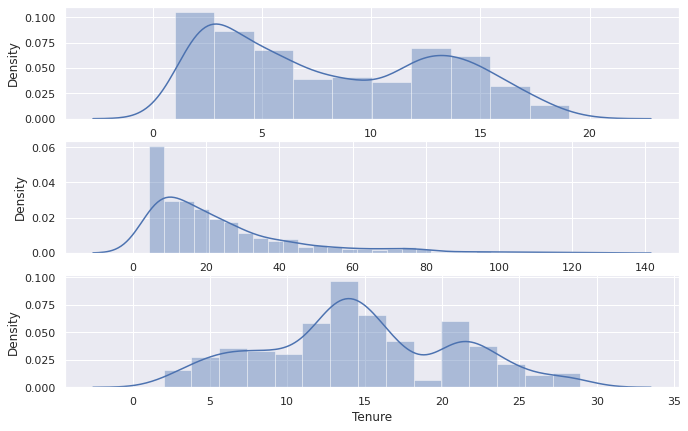

In [150]:
datamart_sqrt = (datamart)**(0.5)

plt.subplot(3,1,1) ; sns.distplot(datamart_sqrt["Recency"])

plt.subplot(3,1,2) ; sns.distplot(datamart_sqrt["MonetaryValue"])

plt.subplot(3,1,3) ; sns.distplot(datamart_sqrt["Tenure"])


In [151]:
from scipy import stats
print(stats.shapiro(datamart_sqrt["Recency"]))
print(stats.shapiro(datamart_sqrt["MonetaryValue"]))
print(stats.shapiro(datamart_sqrt["Tenure"]))

(0.9138001203536987, 2.4299402764810873e-24)
(0.7990274429321289, 1.2799710030264262e-34)
(0.9814667105674744, 1.5525675189920207e-10)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

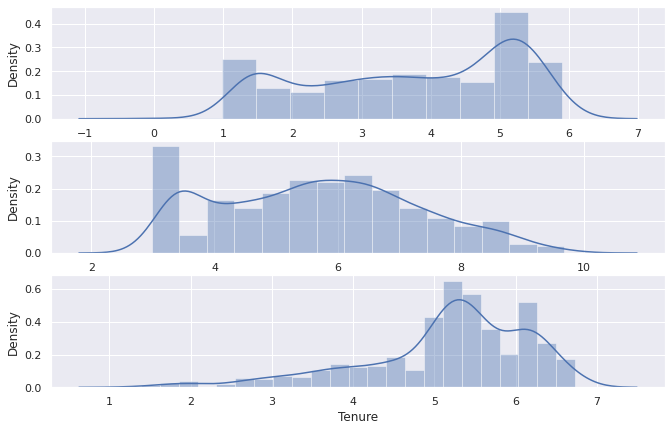

In [152]:
datamart_log = np.log(datamart)

plt.subplot(3,1,1) ; sns.distplot(datamart_log["Recency"])

plt.subplot(3,1,2) ; sns.distplot(datamart_log["MonetaryValue"])

plt.subplot(3,1,3) ; sns.distplot(datamart_log["Tenure"])

In [153]:
from scipy import stats
print(stats.shapiro(datamart_log["Recency"]))
print(stats.shapiro(datamart_log["MonetaryValue"]))
print(stats.shapiro(datamart_log["Tenure"]))

(0.9125019311904907, 1.6620125842410202e-24)
(0.9618704915046692, 3.085428948145912e-16)
(0.9217721223831177, 2.768176656381672e-23)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

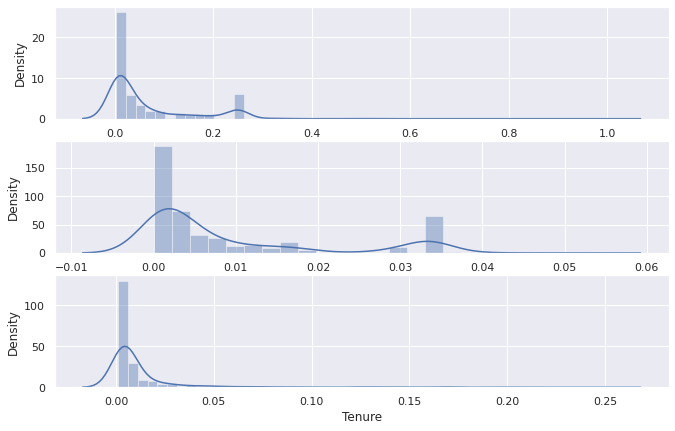

In [154]:
datamart_recip = 1/datamart

plt.subplot(3,1,1) ; sns.distplot(datamart_recip["Recency"])

plt.subplot(3,1,2) ; sns.distplot(datamart_recip["MonetaryValue"])

plt.subplot(3,1,3) ; sns.distplot(datamart_recip["Tenure"])

In [155]:
from scipy import stats
print(stats.shapiro(datamart_recip["Recency"]))
print(stats.shapiro(datamart_recip["MonetaryValue"]))
print(stats.shapiro(datamart_recip["Tenure"]))

(0.6768391132354736, 3.192998680810528e-41)
(0.720300555229187, 3.764285643940327e-39)
(0.40848493576049805, 0.0)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

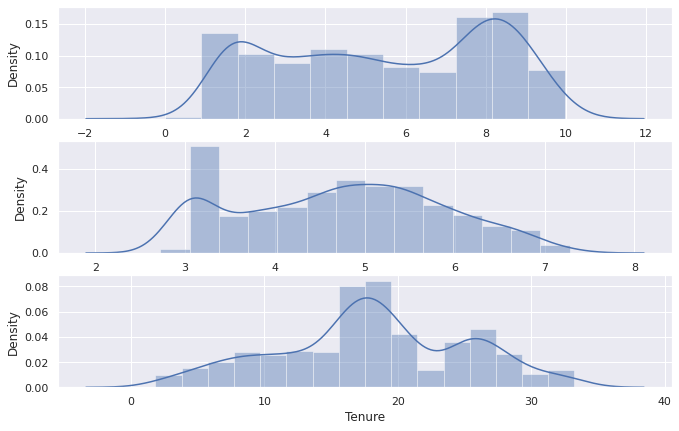

In [156]:
datamart_boxcox = datamart.copy()
from scipy.stats import boxcox
for i in datamart_boxcox:
  datamart_boxcox[i], lmbda = boxcox(datamart_boxcox[i], lmbda=None)

plt.subplot(3,1,1) ; sns.distplot(datamart_boxcox["Recency"])

plt.subplot(3,1,2) ; sns.distplot(datamart_boxcox["MonetaryValue"])

plt.subplot(3,1,3) ; sns.distplot(datamart_boxcox["Tenure"])

In [157]:
from scipy import stats
print(stats.shapiro(datamart_boxcox["Recency"]))
print(stats.shapiro(datamart_boxcox["MonetaryValue"]))
print(stats.shapiro(datamart_boxcox["Tenure"]))

(0.922887921333313, 3.9489360862517926e-23)
(0.9605565071105957, 1.5409714390861843e-16)
(0.9835509061813354, 1.0048020193664797e-09)


In [158]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(datamart_boxcox)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [159]:
datamart_normalized = scaler.transform(datamart_log)

In [160]:
datamart_normalized = pd.DataFrame(data=datamart_normalized, index=datamart.index, columns=datamart.columns)

In [161]:
datamart_normalized.head()

,Recency,MonetaryValue,Tenure
ownerid,,,
0062f2a6-878d-4100-9bea-2b50e266a56e,0.537154,0.147754,0.111978
008fabab-f868-4019-8b50-4022025b51b2,0.543566,0.871906,0.133381
00d2941f-7e9f-4422-a662-2d9012607d35,0.420135,0.541909,0.075275
012069f5-41a9-472c-ad99-1d72ceca4966,0.577181,0.529466,0.127679
0122b307-340f-41e4-88ac-bdd9e14eb26d,0.367379,0.496923,0.133381


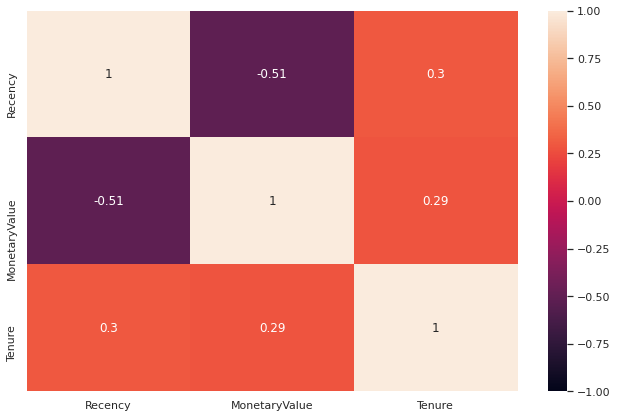

In [162]:
heatmap = sns.heatmap(datamart_normalized.corr(), vmin=-1, vmax=1, annot=True)

In [163]:
print(datamart_normalized.describe().round(2))

       Recency  MonetaryValue   Tenure
count  1085.00        1085.00  1085.00
mean      0.38           0.65     0.11
std       0.15           0.35     0.03
min       0.00           0.06    -0.01
25%       0.25           0.37     0.09
50%       0.40           0.65     0.11
75%       0.51           0.90     0.13
max       0.59           1.53     0.16


In [164]:
from sklearn.mixture import GaussianMixture

compNumbers=np.arange(1,30)
models=[GaussianMixture(n,covariance_type='spherical',random_state=35).fit(datamart_normalized) for n in compNumbers]

Text(0.5, 0, 'Number of Components')

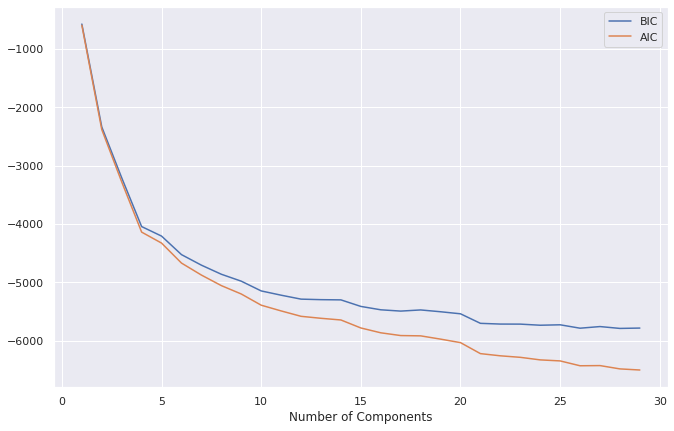

In [165]:
plt.plot(compNumbers,[m.bic(datamart_normalized) for m in models ], label='BIC')
plt.plot(compNumbers,[m.aic(datamart_normalized) for m in models ], label='AIC')
plt.legend(loc='best')
plt.xlabel('Number of Components')

In [166]:
def gmm3d(df,col1,col2,col3,componentNumber):
  gmm = GaussianMixture(n_components=componentNumber,covariance_type='spherical', random_state=1).fit(df)
  labels = gmm.predict(df)

  ax = plt.axes(projection='3d')

  # Data for three-dimensional scattered points
  zdata = df[col1]
  xdata = df[col2]
  ydata = df[col3]
  ax.scatter3D(xdata, ydata, zdata, c=labels, cmap='brg')
  ax.view_init(60, 35)
  ax.set_xlabel(col2)
  ax.set_ylabel(col3)
  ax.set_zlabel(col1)

def gmm2d(df,col1,col2,componentNumber):
  gmm = GaussianMixture(n_components=componentNumber,covariance_type='spherical').fit(df)
  labels = gmm.predict(df)
  plt.scatter(x=df[col1], y=df[col2],c=labels)
  plt.xlabel(col1)
  plt.ylabel(col2)

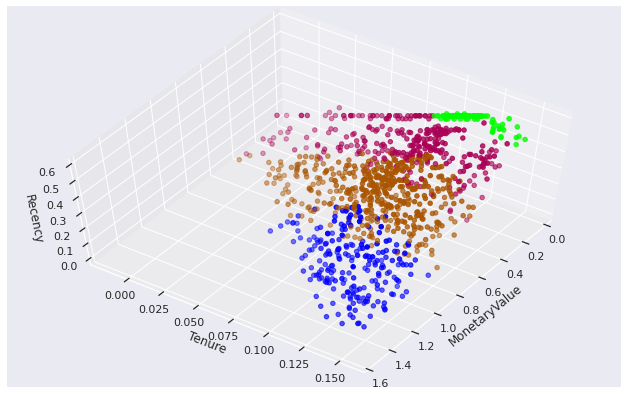

In [167]:
gmm3d(datamart_normalized, "Recency", "MonetaryValue", "Tenure", 4)

In [168]:
def gmm_pca_2d(df, component_number, df_stats):
  
  #GMM
  gmm = GaussianMixture(n_components=component_number ,covariance_type='spherical', random_state=1).fit(df)
  labels = gmm.predict(df)

  #PCA
  from sklearn.decomposition import PCA
  pca = PCA(n_components=2, random_state=1)
  pca.fit(df)

  df_pca = pca.transform(df)

  df_pca = pd.DataFrame(df_pca, columns=["PCA1", "PCA2"])

  df_pca["Clusters"] = labels

  #Plot
  plt.figure(figsize=(14,10))
  sns.scatterplot(df_pca["PCA1"], df_pca["PCA2"], hue=labels, s=25, palette="brg", alpha=0.8)
  #plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='black', marker="x", s=200, alpha=0.8);

  plt.xlabel("PCA1")
  plt.ylabel("PCA2")

  plt.title('PCA Plot of GMM {}'.format(i))
  print("\n")
  plt.show()
  
  #Stats
  df_stats_copy = df_stats.copy()

  df_stats_cluster = df_stats_copy.assign(Cluster = labels)

  datamart_summary = df_stats_cluster.groupby(["Cluster"]).agg({
    "Recency": ["mean", "std"],
    "MonetaryValue": ["mean", "std", "max",],
    "Tenure": ["mean", "std", "count"],
  }).round(0)

  print('\t\t\tNumber of Cluster {}\n'.format(i))
  print(datamart_summary)
  print("\n")

  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


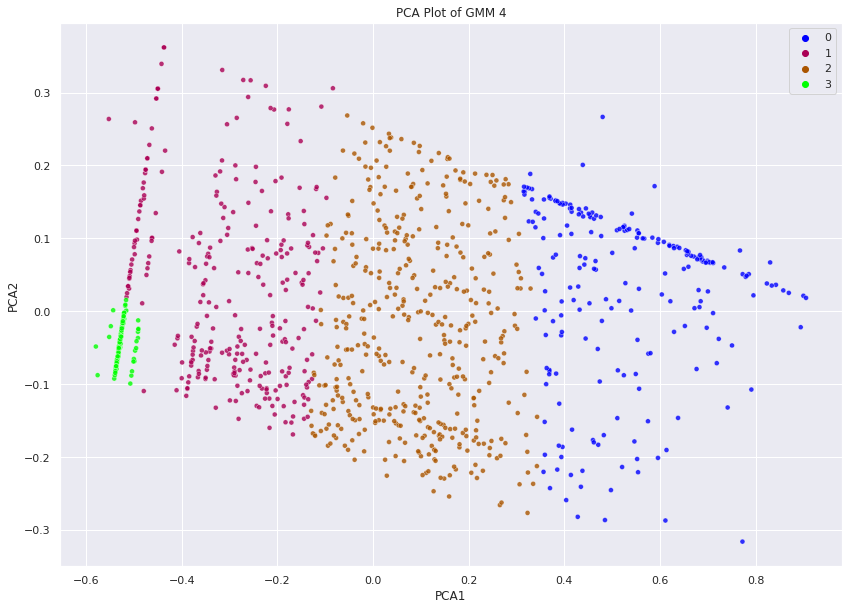

			Number of Cluster 4

        Recency       MonetaryValue                  Tenure             
           mean   std          mean     std      max   mean    std count
Cluster                                                                 
0          24.0  42.0        3761.0  2920.0  15907.0  349.0  216.0   217
1         101.0  85.0          88.0    46.0    189.0  192.0  180.0   296
2          84.0  85.0         535.0   306.0   1699.0  244.0  182.0   446
3         222.0  53.0          30.0     2.0     35.0  269.0  129.0   126






/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


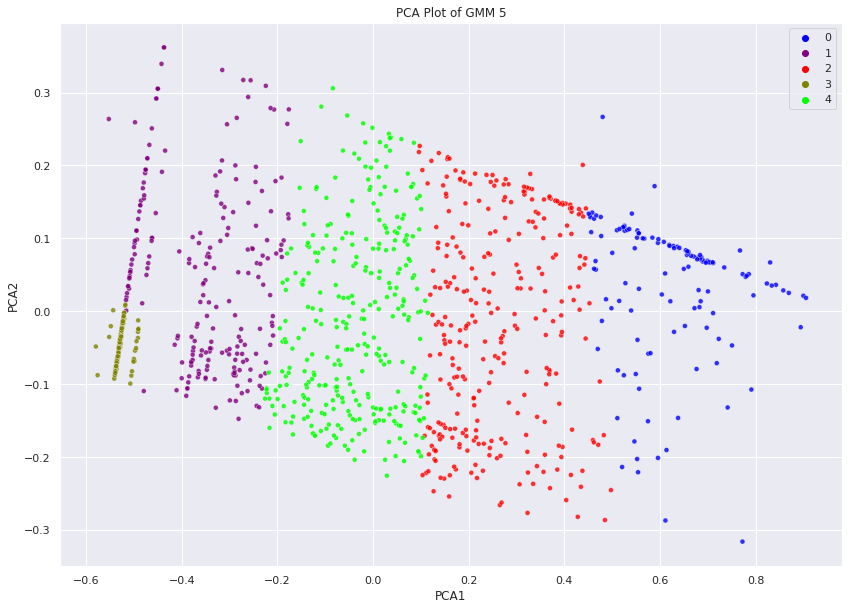

			Number of Cluster 5

        Recency       MonetaryValue                  Tenure             
           mean   std          mean     std      max   mean    std count
Cluster                                                                 
0          14.0  25.0        5258.0  3052.0  15907.0  398.0  212.0   125
1          96.0  83.0          66.0    29.0    122.0  180.0  182.0   223
2          65.0  77.0        1085.0   570.0   3511.0  276.0  185.0   295
3         224.0  52.0          30.0     2.0     35.0  266.0  123.0   124
4          96.0  87.0         279.0   111.0    576.0  224.0  182.0   318




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


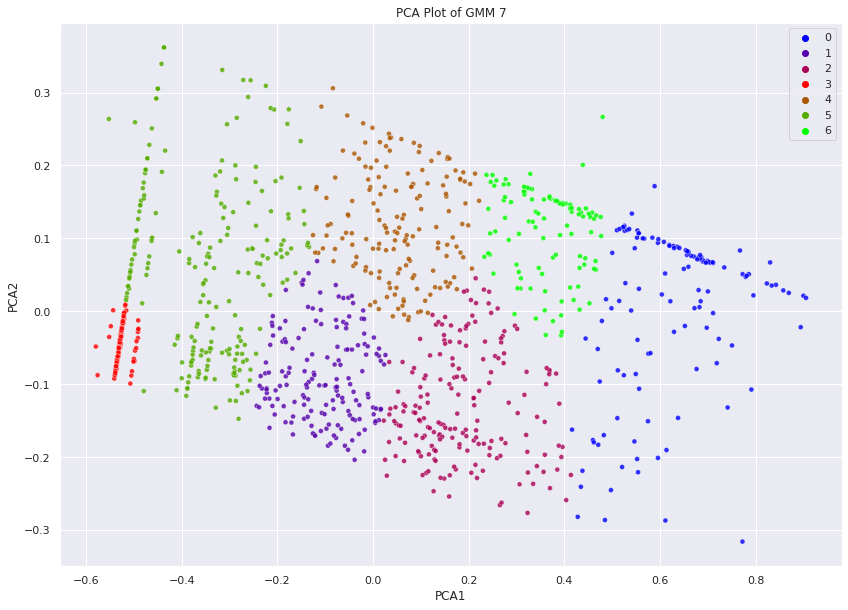

			Number of Cluster 7

        Recency       MonetaryValue                  Tenure             
           mean   std          mean     std      max   mean    std count
Cluster                                                                 
0          24.0  43.0        5357.0  2981.0  15907.0  424.0  208.0   124
1         148.0  78.0         218.0    71.0    371.0  281.0  174.0   162
2         122.0  77.0         874.0   432.0   2369.0  290.0  153.0   188
3         223.0  53.0          30.0     2.0     35.0  270.0  128.0   125
4          15.0  10.0         358.0   134.0    693.0  169.0  191.0   160
5          89.0  82.0          67.0    30.0    150.0  169.0  175.0   222
6           8.0   5.0        1391.0   429.0   2199.0  238.0  189.0   104




In [169]:
important_clusters = [4, 5, 7]
for i in important_clusters:
  gmm_pca_2d(datamart_normalized, i, datamart)

In [170]:
def gmm_stats(df, component_number):
  
  #GMM
  gmm = GaussianMixture(n_components=component_number ,covariance_type='spherical', random_state=1).fit(df)
  labels = gmm.predict(df)

  #Stats
  df_stats_copy = df.copy()

  df_stats_cluster = df_stats_copy.assign(Cluster = labels)

  datamart_summary = df_stats_cluster.groupby(["Cluster"]).agg({
    "Recency": ["mean", "std"],
    "MonetaryValue": ["mean", "std", "max",],
    "Tenure": ["mean", "std", "count"],
  }).round(0)

  print('\t\t\tNumber of Cluster {}\n'.format(i))
  print(datamart_summary)
  print("\n")

In [171]:
important_clusters = [4, 5, 7]
for i in important_clusters:
  gmm_stats(datamart, i)

			Number of Cluster 4

        Recency       MonetaryValue                  Tenure             
           mean   std          mean     std      max   mean    std count
Cluster                                                                 
0          29.0  49.0        4161.0  1303.0   6671.0  403.0  213.0   102
1         114.0  94.0         203.0   181.0    674.0  218.0  174.0   741
2          13.0  29.0       10534.0  2758.0  15907.0  504.0  167.0    23
3          59.0  75.0        1222.0   448.0   2231.0  279.0  182.0   219


			Number of Cluster 5

        Recency       MonetaryValue                  Tenure             
           mean   std          mean     std      max   mean    std count
Cluster                                                                 
0          29.0  49.0        4161.0  1303.0   6671.0  403.0  213.0   102
1         114.0  95.0         202.0   180.0    670.0  218.0  174.0   740
2           8.0   7.0        8355.0   866.0   9742.0  436.0  146.0    12
3

### The Labels of Clusters

*   Cluster 0: Old but low frequent
*   Cluster 1: Not so New but Inactive
*   Cluster 2: VIP Candidates
*   Cluster 3: VIP
*   Cluster 4: Just First Walk
*   Cluster 5: New Comers
*   Cluster 6: About to Churn

In [172]:
gmm = GaussianMixture(n_components=4 ,covariance_type='spherical', random_state=1).fit(datamart_normalized)
labels = gmm.predict(datamart_normalized)

In [173]:
probs = gmm.predict_proba(datamart_normalized)
print(probs[:10].round(3))

[[0.    0.001 0.    0.999]
 [0.002 0.    0.998 0.   ]
 [0.    0.531 0.469 0.   ]
 [0.    0.72  0.28  0.   ]
 [0.    0.806 0.194 0.   ]
 [0.021 0.    0.979 0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.004 0.995 0.   ]
 [0.001 0.    0.999 0.   ]
 [1.    0.    0.    0.   ]]


In [174]:
size = probs.max(1)

datamart_probs = datamart.copy()
datamart_probs["Probs"] = size
datamart_probs["Clusters"] = labels
datamart_probs.sort_values("Probs", ascending=False).head(100)

,Recency,MonetaryValue,Tenure,Probs,Clusters
ownerid,,,,,
eea120c4-6c99-4c83-8251-1ea3d1e89dd3,4,15907.370000,574,1.000000,0
c0caef87-8143-4fe2-a071-44aea8d3905a,4,15519.620000,405,1.000000,0
12652cc3-a4c3-43ef-9ad0-2d55c64d3c7b,6,15783.313333,796,1.000000,0
7ebb85b5-8d08-40b5-a334-0d32fd9b7be2,4,13422.000000,834,1.000000,0
09454dfc-489a-4b85-baa7-84e84d2d9332,4,12723.220000,726,1.000000,0
...,...,...,...,...,...
42149c1c-1b64-44bf-b9ee-1239fc6f359b,49,34.900000,49,0.999994,1
a9ad8936-b6d6-482c-9160-97d1f6c7b11b,4,4914.500000,183,0.999994,0
feeeefc8-935d-4d87-9009-f819220f842e,35,34.900000,35,0.999994,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


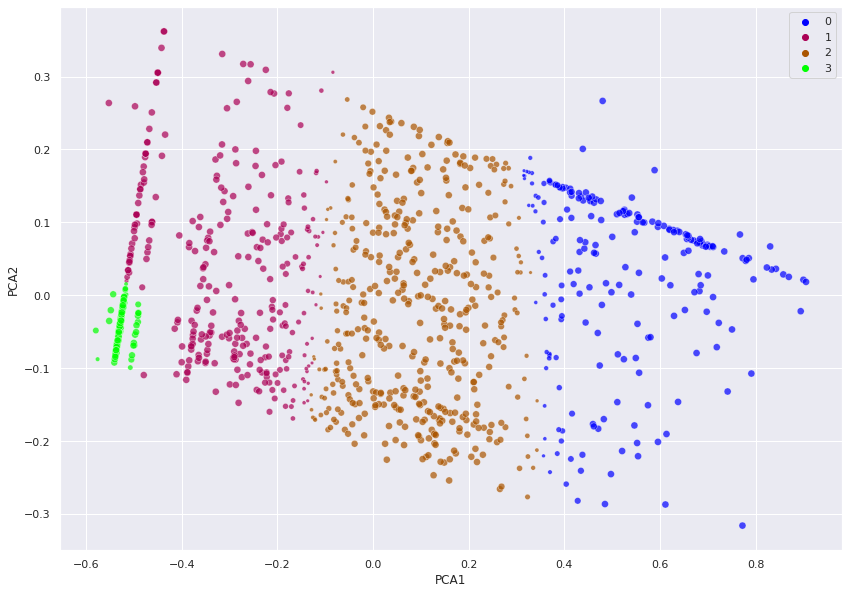

In [175]:
size_emp = 50 * probs.max(1) ** 2

from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=1)
pca.fit(datamart_normalized)

datamart_normalized_pca = pca.transform(datamart_normalized)

datamart_normalized_pca = pd.DataFrame(datamart_normalized_pca, columns=["PCA1", "PCA2"])

datamart_normalized_pca["Clusters"] = labels

 
plt.figure(figsize=(14,10))

sns.scatterplot(datamart_normalized_pca["PCA1"], datamart_normalized_pca["PCA2"], hue=labels, s=size_emp, palette="brg", alpha=0.7)

plt.show()

In [176]:
datamart_probs

,Recency,MonetaryValue,Tenure,Probs,Clusters
ownerid,,,,,
0062f2a6-878d-4100-9bea-2b50e266a56e,212,29.90,212,0.999295,3
008fabab-f868-4019-8b50-4022025b51b2,226,807.40,415,0.998391,2
00d2941f-7e9f-4422-a662-2d9012607d35,66,179.80,67,0.531384,1
012069f5-41a9-472c-ad99-1d72ceca4966,316,169.90,347,0.719688,1
0122b307-340f-41e4-88ac-bdd9e14eb26d,39,146.51,415,0.806028,1
...,...,...,...,...,...
feeeefc8-935d-4d87-9009-f819220f842e,35,34.90,35,0.999994,1
ff395835-2462-47e5-a202-e8d2693d750b,53,104.70,56,0.984182,1
ffb5f434-54e6-4f82-837a-b0ef8b878b43,50,279.13,97,0.966668,2


In [177]:
datamart_probs_summary = datamart_probs.groupby(["Clusters"]).agg({
    "Probs": ["mean", "std", "max", "min"]
  }).round(2)

datamart_probs_summary.columns = datamart_probs_summary.columns.map('_'.join)
datamart_probs_summary = datamart_probs_summary.reset_index(drop=False)

datamart_probs_summary.sort_values("Probs_mean", ascending=False)

,Clusters,Probs_mean,Probs_std,Probs_max,Probs_min
3,3,0.98,0.06,1.0,0.6
2,2,0.94,0.11,1.0,0.5
0,0,0.93,0.13,1.0,0.5
1,1,0.93,0.12,1.0,0.5


In [178]:
for i in range(4):
 prob = datamart_probs[datamart_probs["Clusters"] == i]
 prob_80 = prob[prob["Probs"] >= 0.80].count()
 prob_80_rate = prob_80.Probs/prob.Probs.count()
 
 print('Cluster {}'.format(i))
 print(prob_80_rate.round(2))

Cluster 0
0.85
Cluster 1
0.86
Cluster 2
0.89
Cluster 3
0.97


In [183]:
for i in range(4):
 prob = datamart_probs[datamart_probs["Clusters"] == i]
 prob_50 = prob[prob["Probs"] <= 0.50].count()
 prob_50_rate = prob_50.Probs/prob.Probs.count()
 
 print('Cluster {}'.format(i))
 print(prob_50.Probs.round(3))
 print(prob.Probs.count())
 print(prob_50_rate.round(3))

Cluster 0
0
217
0.0
Cluster 1
0
296
0.0
Cluster 2
0
446
0.0
Cluster 3
0
126
0.0
